In [1]:
import numpy as np
import astropy.units as u
from astropy.constants import G

# import plotting modules
import matplotlib
import matplotlib.pyplot as plt
from matplotlib.colors import LogNorm

# my modules
from ReadFile import Read
from CenterOfMass import CenterOfMass
from MassProfile import MassProfile

# for contours
import scipy.optimize as so

In [ ]:
"""
My Topic: 
        Mass loss of dark matter and changes to the 
        internal dark matter profile of halos


Question that I am trying to answer:
        What is the #D shape of the dark matter distribution of M33 - 
        how does this change with time? Is it elongated/ellipsoid or spherical?
        what do terms like prolate, oblate, or triaxal halos mean


Right now I am focusing on determining what snapshots represent M33 at
its apecenter, pericenter, and midpoints in its orbit during the orbit
around M31
I have also made a first attempt at graphing those contour diagrams



"""

In [2]:
""" 
I need to create a code meant to evaluate how the dark matter halo of the
M33 Galaxy evolves.
In order to do this, I am going to be looking a contour fitting of the dark matter halo,
as well as making density profiles of the dark matter in the galaxy.

I am going to be looking at several different snapshots during important moments of the merger. 
With this, I will be able to examine the tidal evolution of M33.
"""

' \nI need to create a code meant to evaluate how the dark matter halo of the\nM33 Galaxy evolves.\nIn order to do this, I am going to be looking a contour fitting of the dark matter halo,\nas well as making density profiles of the dark matter in the galaxy.\n\nI am going to be looking at several different snapshots during important moments of the merger. \nWith this, I will be able to examine the tidal evolution of M33.\n'

In [3]:
"""
First, I need to determine the points during the merger that I would like to look at
To start, I am going to look at a couple the pericenters and apocentes of M33s dark matter halo
in order to determine the snapshots that I would like to graph
"""


'\nFirst, I need to determine the points during the merger that I would like to look at\nTo start, I am going to look at a couple the pericenters and apocentes of M33s dark matter halo\nin order to determine the snapshots that I would like to graph\n'

In [9]:
"""
Here I am loading in the data that was calculated during homework 6
to get the position of M33 and M31 at several different points in time
"""
dataM31 = np.genfromtxt("orbit_M31.txt",dtype=None,names=True)
dataM33 = np.genfromtxt("orbit_M33.txt",dtype=None,names=True)

In [11]:
"""
this function is from HW6, it is used to determine the distance between the center of masses of two galaxies as a function of time
in order to determine which points I want to look at the structure of M33, im going to need to have this data available first
"""

# function to compute the magnitude of the difference between two vectors 
# You can use this function to return both the relative position and relative velocity for two 
# galaxies over the entire orbit 

def dvectors(file1,file2):
    """
    This function loops over the datafiles for position and velocity vectors of two galaxies and creates 2
    lists that represents how the magnitudes of the distance and velocity between the two galaxies change over time
    Inputs:
        file1: the file containing the time, position, and velocity data for one of the galaxies
        file2: the file containing the time, position, and velocity data for the other galaxy

    Outputs:
        dis: A list containing the distance between two galaxies over time
        vel: A list containing the velcoity between two galaxies over time
    """
    dist = np.zeros(len(file1))
    vdist = np.zeros(len(file1))
    time = np.zeros(len(file1))
    for i in range(len(file1)):
        # Gathers position and velocity data for each point in time 
        x1 = file1[i][1]
        y1 = file1[i][2]
        z1 = file1[i][3]
        vx1 = file1[i][4]
        vy1 = file1[i][5]
        vz1 = file1[i][6]
        x2 = file2[i][1]
        y2 = file2[i][2]
        z2 = file2[i][3]
        vx2 = file2[i][4]
        vy2 = file2[i][5]
        vz2 = file2[i][6]
        t1 = file1[i][0] *1e-3
        # Computes the magnitudes of distance and velocity for each galaxy and stores them
        # as a data point on an array
        dist[i] = np.sqrt((x1-x2)**2+(y1-y2)**2+(z1-z2)**2)
        vdist[i] = np.sqrt((vx1-vx2)**2+(vy1-vy2)**2+(vz1-vz2)**2)
        time[i] = t1
        #converts arrays to lists
        tim = time.tolist()
        dis = dist.tolist()
        vel = vdist.tolist()
    return dis,vel,tim
        
        
        
    


In [13]:
M3133 = dvectors(dataM31,dataM33)

In [15]:
def deriv(dist,vel,time):
    """
    This function takes the file created in distance and computes areas where
    the derivative of the distance is roughly zero. 
    (It's worth noting that this is an extremely crude approximation, but as shown later, it works in this case)
    It also computes the midpoints in time between these derivatives
    for now, I am using the data from the .txt files created in homework 6, where we stored the center of mass of the galaxies
    at several different intervals. 
    After finding the indexes that I am looking for, and separating them into lists for apocenter, pericenter, and midpoint,
    I multiply the index values by 5 to get the snapshot
    note: 5 is the interval in which I wrote certain snapshots into the .txt file from homework 6
    """
    #dist, vel, time = 
    apo = []
    an = []
    pn = []
    per = []
    apo_t = []
    per_t = []
    index = []
    points = []
    points_t = []
    #distance = []
    #time = []
    n = 0
    nstep = 'min'
    while n < len(time)-1:
        if nstep == 'max':
            if dist[n] > dist[n+1]:
                apo.append(dist[n])
                points.append(dist[n])
                apo_t.append(time[n])
                points_t.append(time[n])
                index.append(n)
                an.append (n)
                nstep = 'min'
        if nstep == 'min':
            if dist[n] < dist[n+1]:
                per.append(dist[n])
                points.append(dist[n])
                per_t.append(time[n])
                points_t.append(time[n])
                index.append(n)
                pn.append(n)
                nstep = 'max'
        n = n+1
    midpoints = []
    m = 0
    while m < len(index)-1:
        midpoints.append(int(np.round((index[m]+(index[m+1]))/2,0)))
        m = m+1
    apo_snaps = np.array(an)*5
    peri_snaps = np.array(pn)*5
    mid_snaps = np.array(midpoints)*5
    return apo_snaps, peri_snaps, mid_snaps, apo_t, per_t
    #return apo,apo_t,per,per_t,index,points,points_t,an,pn
        


In [17]:
dist, vel, time = M3133

In [19]:
#a,at,p,pt,index,points,points_t,an,pn = deriv(dist,vel,time)
apo_snaps, peri_snaps, mid_snaps, at, pt = deriv(dist,vel,time)

In [21]:
print (apo_snaps)

[185 380 525 625 705 775]


In [23]:
print (mid_snaps)

[125 240 340 425 500 550 600 650 690 720 760]


In [25]:
print (peri_snaps)

[ 65 300 470 580 670 740]


In [27]:
"""
At this point, I have narrowed down the snapshots that i want to use by a lot
Now I would love to use a for loop to gather the data for each snapshot and then plot them
One thing that I am stuck on is how to mark what direction M31 is on the graph
"""


'\nAt this point, I have narrowed down the snapshots that i want to use by a lot\nNow I would love to use a for loop to gather the data for each snapshot and then plot them\nOne thing that I am stuck on is how to mark what direction M31 is on the graph\n'

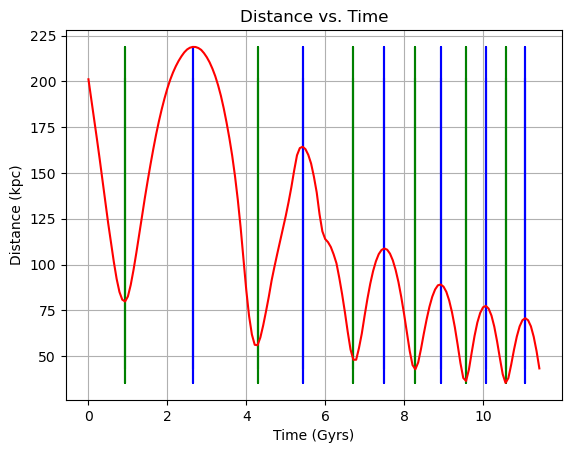

In [29]:
"""
Here I am graphing my pericenter and apocenter points over the graph from Homework 6
to confirm that my code works
"""
distances2 = M3133[0] # gets the distances from M3133
time_2 = M3133[2] # gets the times from M3133
for i in at:
    j = [i]
    k = j * len(distances2)
    plt.plot(k,distances2, linestyle='-', color='blue', label = 'apocenter')
for i in pt:
    j = [i]
    k = j * len(distances2)
    plt.plot(k,distances2, linestyle='-', color='green', label = 'pericenter')
plt.plot(time_2,distances2, linestyle='-', color='red', label = 'simulation')
#plt.plot(tesst2,distances2, linestyle='-', color='blue', label = 'test') 
plt.xlabel("Time (Gyrs)")
plt.ylabel("Distance (kpc)")
plt.title("Distance vs. Time")
#plt.ylim(0,800)
plt.grid(True)
#plt.legend()
plt.show()

In [31]:
"""
Here I use the code in lab  to create a confidence interval
This part is not done yet
"""

def find_confidence_interval(x, pdf, confidence_level):
    return pdf[pdf > x].sum() - confidence_level

def density_contour(xdata, ydata, nbins_x, nbins_y, ax=None, **contour_kwargs):
    """ Create a density contour plot.
    Parameters
    ----------
    xdata : numpy.ndarray
    ydata : numpy.ndarray
    nbins_x : int
        Number of bins along x dimension
    nbins_y : int
        Number of bins along y dimension
    ax : matplotlib.Axes (optional)
        If supplied, plot the contour to this axis. Otherwise, open a new figure
    contour_kwargs : dict
        kwargs to be passed to pyplot.contour()
        
    Example Usage
    -------------
     density_contour(x pos, y pos, contour res, contour res, axis, colors for contours)
     e.g.:
     density_contour(xD, yD, 80, 80, ax=ax, 
         colors=['red','orange', 'yellow', 'orange', 'yellow'])

    """

    H, xedges, yedges = np.histogram2d(xdata, ydata, bins=(nbins_x,nbins_y), density=True)
    # NOTE : if you are using the latest version of python, in the above: 
    # instead of normed=True, use density=True
    
    x_bin_sizes = (xedges[1:] - xedges[:-1]).reshape((1,nbins_x))
    y_bin_sizes = (yedges[1:] - yedges[:-1]).reshape((nbins_y,1))

    pdf = (H*(x_bin_sizes*y_bin_sizes))
    
    X, Y = 0.5*(xedges[1:]+xedges[:-1]), 0.5*(yedges[1:]+yedges[:-1])
    Z = pdf.T
    fmt = {}
    
    ### Adjust Here #### 
    
    # Contour Levels Definitions
    one_sigma = so.brentq(find_confidence_interval, 0., 1., args=(pdf, 0.68))
    new_sigma = so.brentq(find_confidence_interval, 0., 1., args=(pdf, 0.80))
    two_sigma = so.brentq(find_confidence_interval, 0., 1., args=(pdf, 0.95))
    three_sigma = so.brentq(find_confidence_interval, 0., 1., args=(pdf, 0.99))
    
    
    # You might need to add a few levels


    # Array of Contour levels. Adjust according to the above
    levels = [one_sigma, new_sigma, two_sigma, three_sigma][::-1]
    
    # contour level labels  Adjust accoding to the above.
    strs = ['0.68','0.80','0.95', '0.99'][::-1]

    
    ###### 
    
    if ax == None:
        contour = plt.contour(X, Y, Z, levels=levels, origin="lower", **contour_kwargs)
        for l, s in zip(contour.levels, strs):
            fmt[l] = s
        plt.clabel(contour, contour.levels, inline=True, fmt=fmt, fontsize=12)

    else:
        contour = ax.contour(X, Y, Z, levels=levels, origin="lower", **contour_kwargs)
        for l, s in zip(contour.levels, strs):
            fmt[l] = s
        ax.clabel(contour, contour.levels, inline=True, fmt=fmt, fontsize=12)
    
    return contour



In [37]:
"""
Here I am putting the stuff from lab 7 into a function to make things a little cleaner later on
"""
def create_graph(filename):
    COMD = CenterOfMass(filename,2)
    COMP = COMD.COM_P(0.1)
    COMV = COMD.COM_V(COMP[0],COMP[1],COMP[2])
    # Determine positions of disk particles relative to COM 
    xD = COMD.x - COMP[0].value 
    yD = COMD.y - COMP[1].value 
    zD = COMD.z - COMP[2].value 

    # total magnitude
    rtot = np.sqrt(xD**2 + yD**2 + zD**2)

    # Determine velocities of disk particles relatiev to COM motion
    vxD = COMD.vx - COMV[0].value 
    vyD = COMD.vy - COMV[1].value 
    vzD = COMD.vz - COMV[2].value 

    # total velocity 
    vtot = np.sqrt(vxD**2 + vyD**2 + vzD**2)

    # Arrays for r and v 
    r = np.array([xD,yD,zD]).T # transposed 
    v = np.array([vxD,vyD,vzD]).T
    #graph(xD,yD)
        
    # M31 Disk Density 
    fig, ax= plt.subplots(figsize=(12, 10))

    # ADD HERE
    # plot the particle density for M31 using a 2D historgram
    # plt.hist2D(pos1,pos2, bins=, norm=LogNorm(), cmap='' )
    # cmap options: 
    # https://matplotlib.org/3.1.0/tutorials/colors/colormaps.html  
    #   e.g. 'magma', 'viridis'
    # can modify bin number to make the plot smoother
    plt.hist2d(xD,yD,bins = 100, norm = LogNorm(), cmap='viridis')

    cbar = plt.colorbar()
    cbar.set_label("Number of disk particle per bin", fontsize=15)

    # ADD HERE
    # make the contour plot
    # x pos, y pos, contour res, contour res, axis, colors for contours.
    # remember to adjust this if there are other contours added
    # density_contour(pos1, pos2, res1, res2, ax=ax, colors=[])

    density_contour(xD,yD,80,80,ax = ax, colors=['yellow','white','green','cyan'])

    # Add axis labels
    plt.xlabel('x (kpc)', fontsize=22)
    plt.ylabel('y (kpc)', fontsize=22)

    #set axis limits
    plt.ylim(-15,15)
    plt.xlim(-15,15)

    #adjust tick label font size
    label_size = 22
    matplotlib.rcParams['xtick.labelsize'] = label_size 
    matplotlib.rcParams['ytick.labelsize'] = label_size



    # Save to a file
    #plt.savefig('Lab7_M31Disk.png')
    plt.show()
    


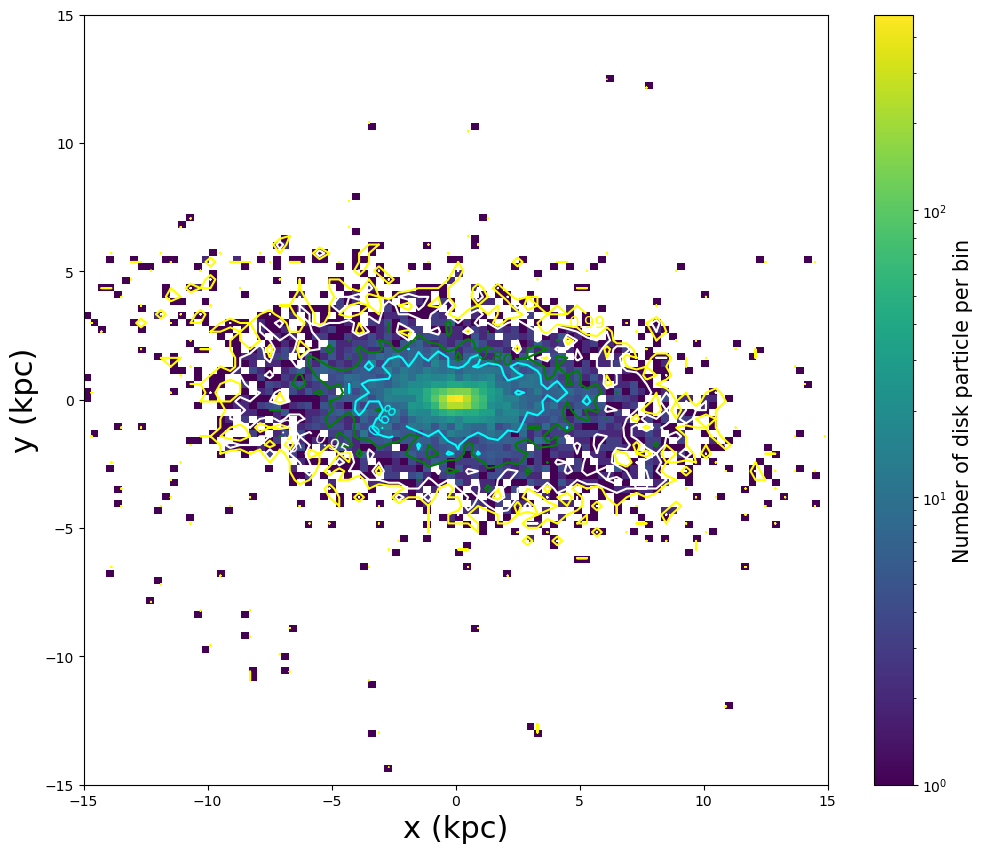

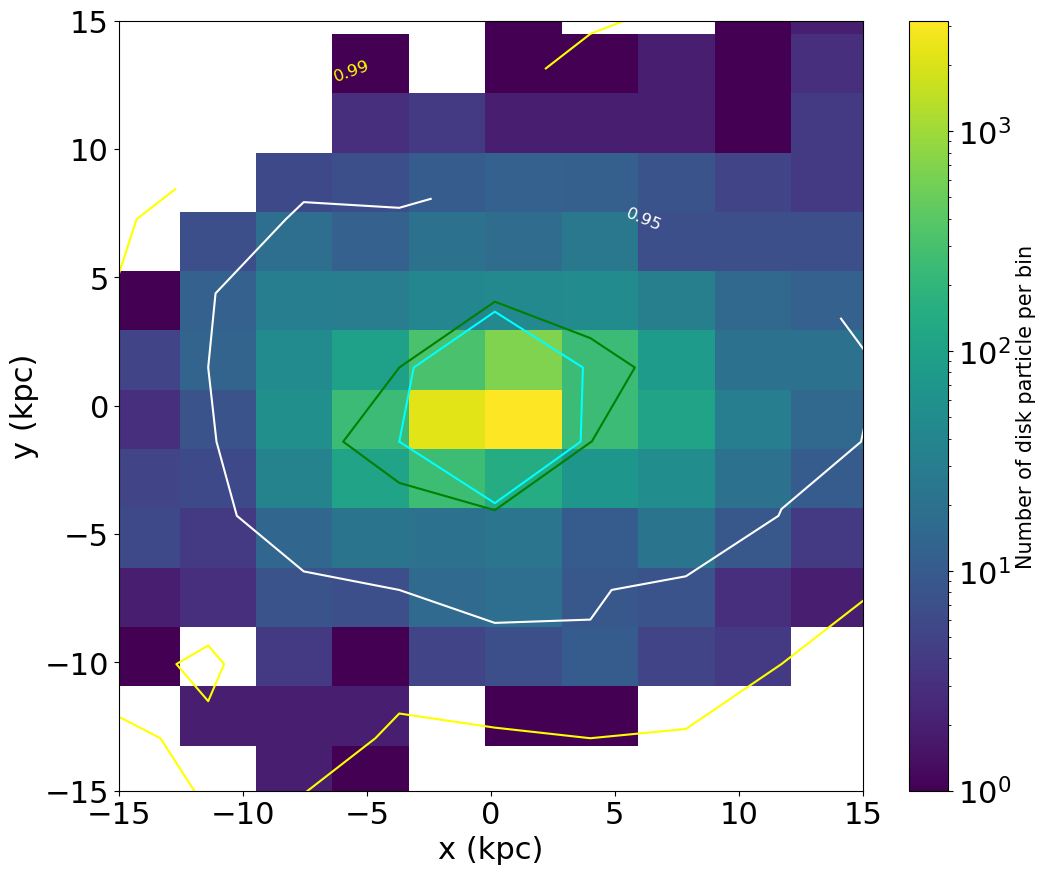

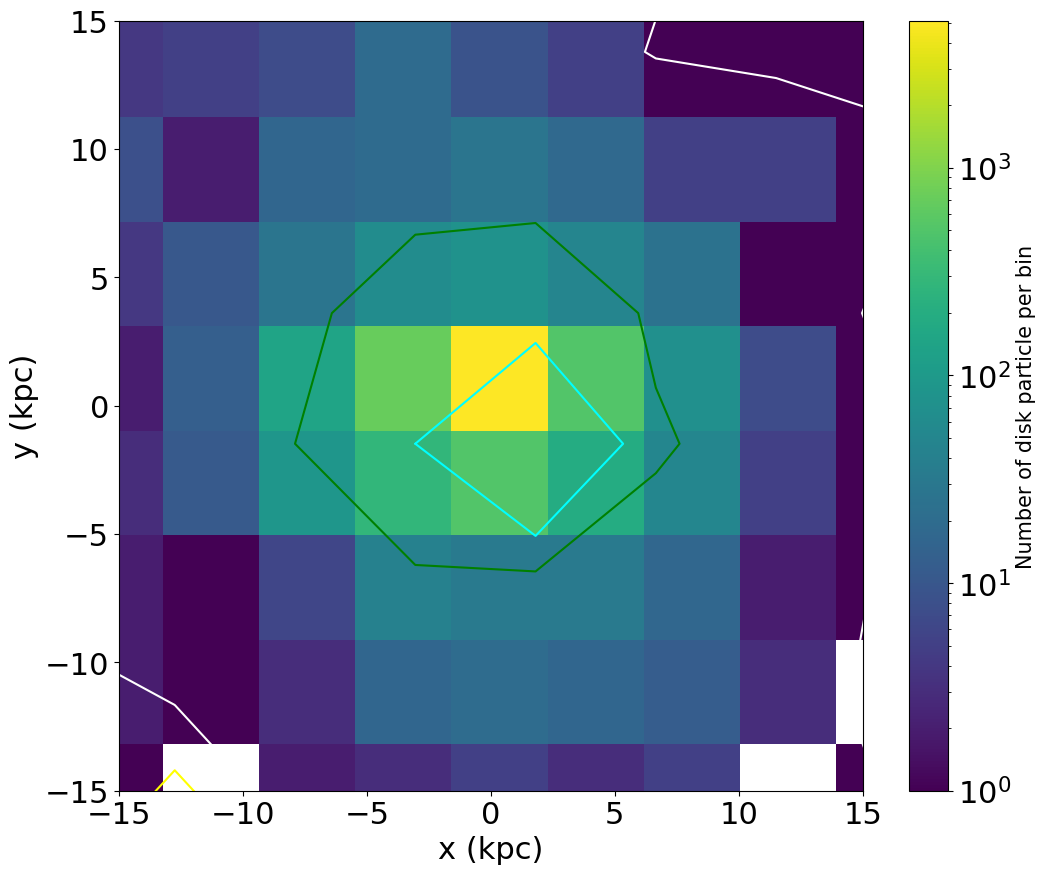

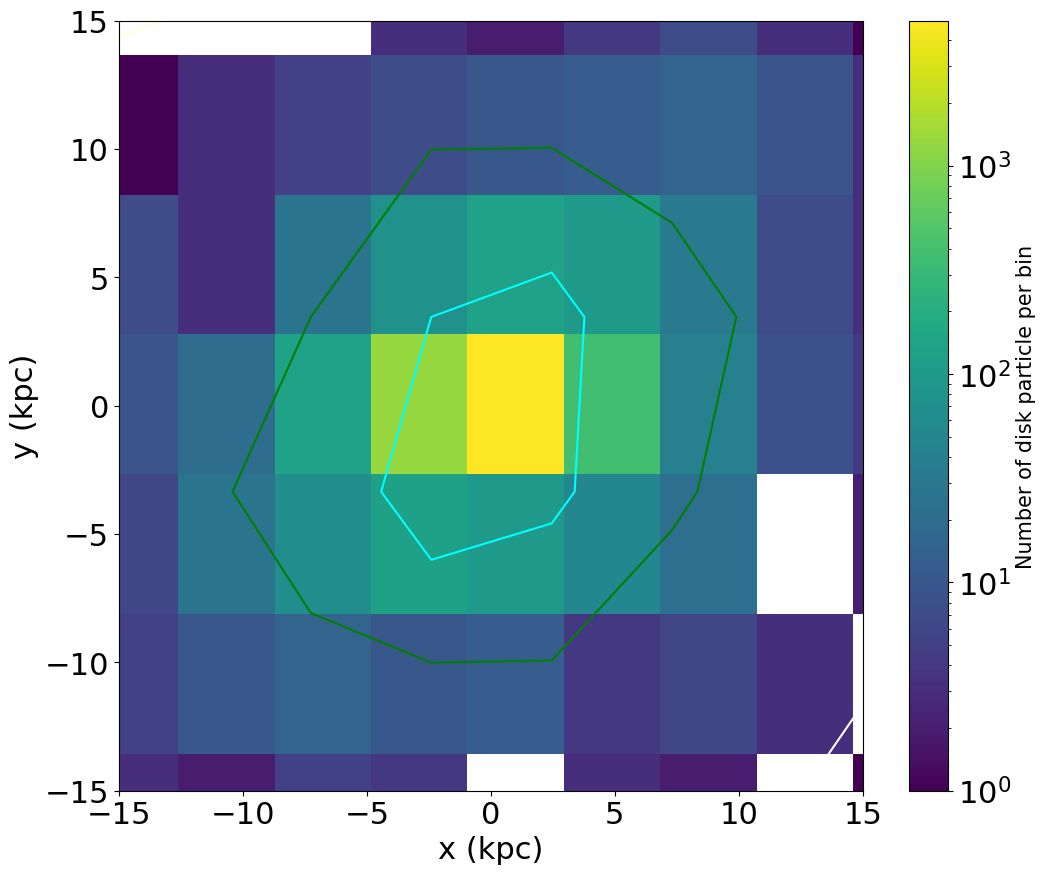

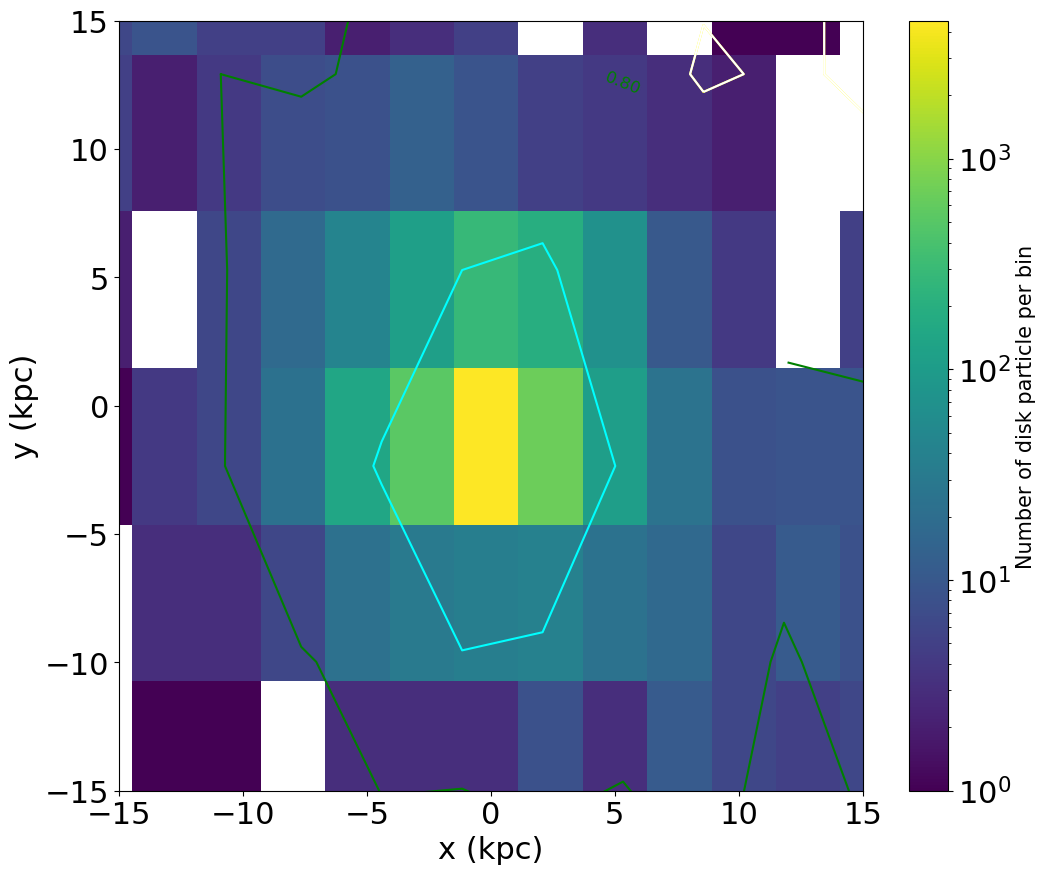

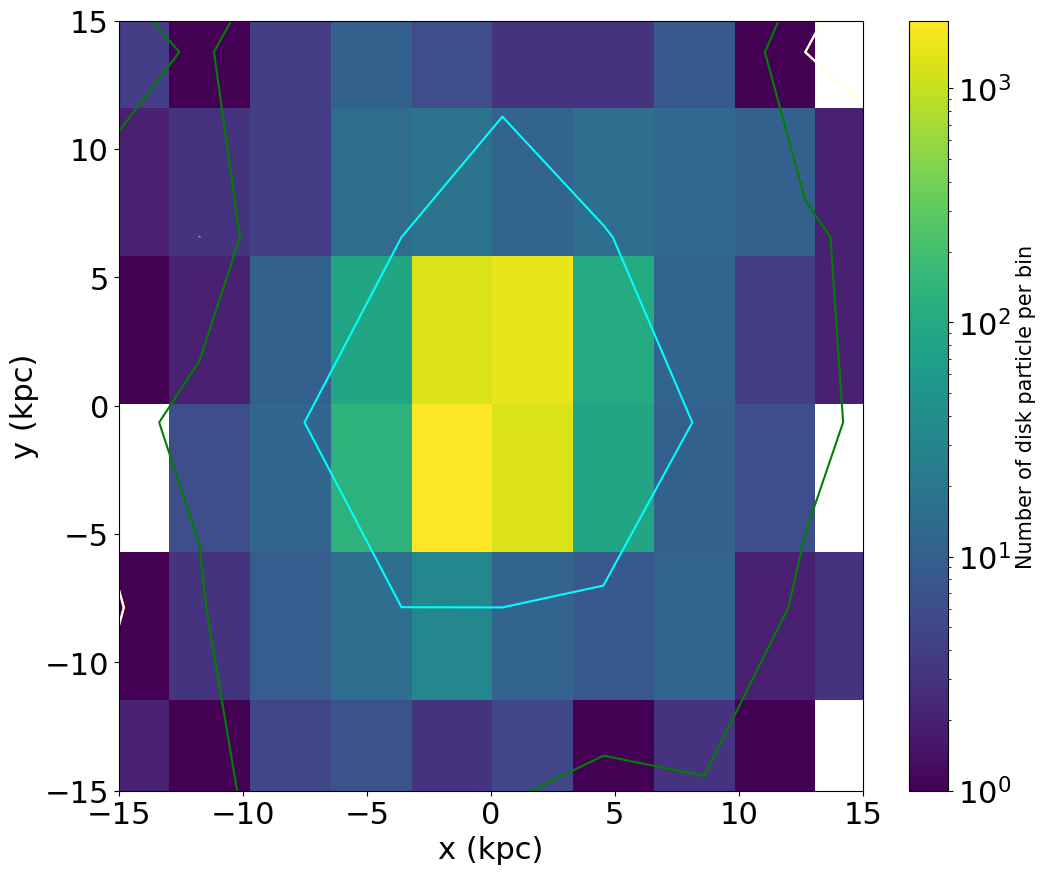

In [39]:
"""
Here I am running through all of the snapshots where M33 is at the apocenter of its orbit
I still need to rotate them right now
I am hoping thats why the later snapshots look really weird
"""
for snap in apo_snaps:
    ilbl = '000' + str(snap)
    ilbl = ilbl[-3:]
    filename = "%s_"%(galaxy) + ilbl+ '.txt'
    create_graph(filename)

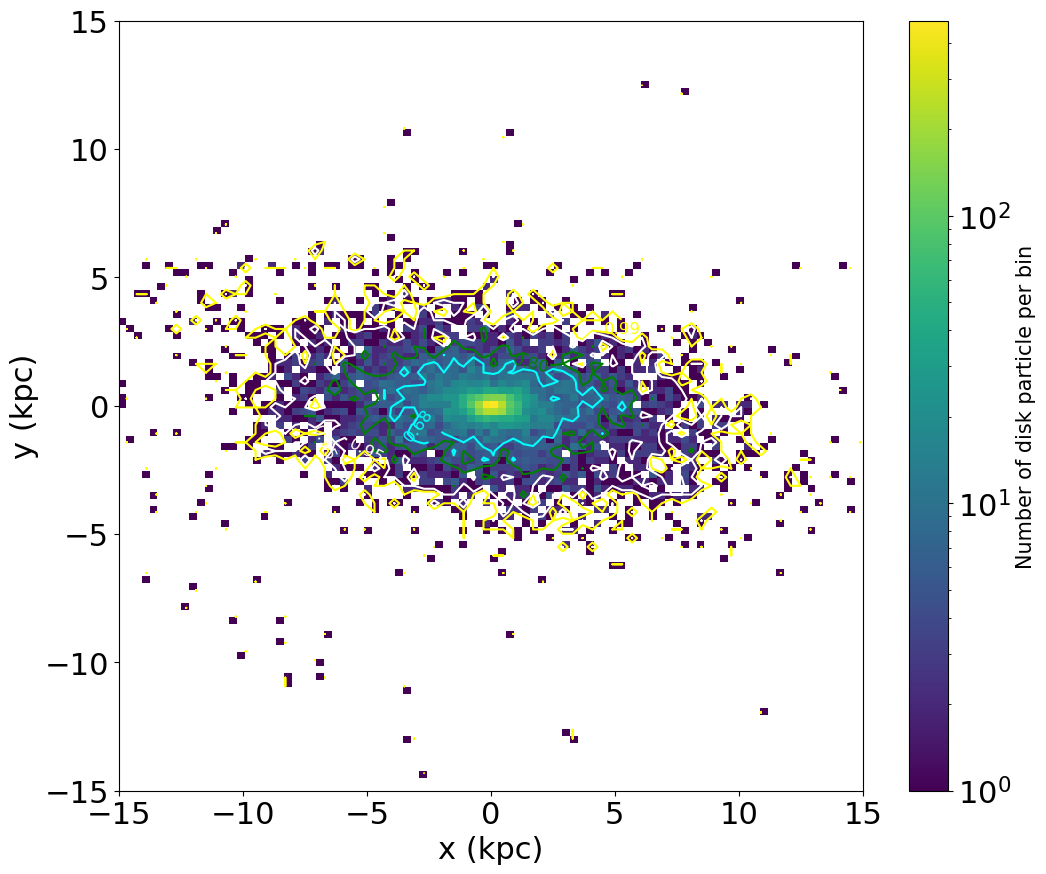

In [337]:
create_graph('M33_185.txt')
#create_graph('M33_000.txt')